Key Takeaways

Encoding:
Encoder fit() = Convert text to numbers

Training data:
Encoder transform(training data) = Encodes training data
Model fit(encoded training data) = Learn fraud patterns
Model predict(encoded training data) = Make predictions on training **Optional, not needed except for diagnostic purposes**

Test data:
Encoder transform(test data) = Encodes test data
Model predict(encoded test data) = Make predictions on test data

New data:
Encoder transform(new data) = Encodes new data (NO fit!)
Model predict(encoded new data ) Make predictions on new data (NO fit!)

Two separate fit() calls:
encoder.fit() - learns encoding
model.fit() - learns patterns

In [93]:
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot

In [94]:
full_data = pd.read_csv('car.data')
full_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [95]:
# Select features for training create a new dataset
selected_data = full_data[['buying','maint','safety', 'class']].copy()
selected_data.head()

,buying,maint,safety,class
0,vhigh,vhigh,low,unacc
1,vhigh,vhigh,med,unacc
2,vhigh,vhigh,high,unacc
3,vhigh,vhigh,low,unacc
4,vhigh,vhigh,med,unacc


In [96]:
# Encode Data

#Create LabelEncoder
#Features
le_buying = LabelEncoder()
le_maint = LabelEncoder()
le_safety = LabelEncoder()
#Target
le_class = LabelEncoder()

#Fit Encoder
#Features
le_buying.fit(selected_data['buying'])
le_maint.fit(selected_data['maint'])
le_safety.fit(selected_data['safety'])
#Target
le_class.fit(selected_data['class'])

#Transform Encoder
#Features
selected_data['buying_encoded'] = le_buying.transform(selected_data['buying'])
selected_data['maint_encoded'] = le_maint.transform(selected_data['maint'])
selected_data['safety_encoded'] = le_safety.transform(selected_data['safety'])
#Target
selected_data['class_encoded'] = le_class.transform(selected_data['class'])

selected_data.head()


,buying,maint,safety,class,buying_encoded,maint_encoded,safety_encoded,class_encoded
0,vhigh,vhigh,low,unacc,3,3,1,2
1,vhigh,vhigh,med,unacc,3,3,2,2
2,vhigh,vhigh,high,unacc,3,3,0,2
3,vhigh,vhigh,low,unacc,3,3,1,2
4,vhigh,vhigh,med,unacc,3,3,2,2


In [97]:
#Create Feature (X) and Target (y) datasets

X=selected_data[['buying_encoded','maint_encoded','safety_encoded']]
y = selected_data[['class_encoded']]

print(X.shape)
print(y.shape)

(1728, 3)
(1728, 1)


In [98]:
#Split the training and test data in 80/20 ratio, ensuring class proportions are maintained
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

print(X.shape)
print(y.shape)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1728, 3)
(1728, 1)
(1382, 3)
(346, 3)
(1382, 1)
(346, 1)


In [99]:
#Create model to be used
knn_mod = neighbors.KNeighborsClassifier()
knn_mod

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [100]:
#Fit/train the model on training data
knn_mod.fit(X_train,y_train)

/Users/garimajaiswal/Learning/AI-ML/ai-ml-learning-journey/.venv/lib/python3.14/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [101]:
#Predict on the test data
prediction_encoded = knn_mod.predict(X_test)
prediction_encoded

array([1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0,
       2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 1,
       2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,

In [102]:
#Decode Prediction
prediction_text = le_class.inverse_transform(prediction_encoded)
prediction_text

array(['good', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good',
       'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'acc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'good', 'acc', 'good', 'unacc', 'good', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'good',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'acc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'u

In [103]:
# Evaluate classification metrics

#should be based on encoded target as the model predicted that and not the text
print(f"Accuracy: {accuracy_score(y_test, prediction_encoded):.3f}")
print(f"Precision: {precision_score(y_test, prediction_encoded, average='macro', zero_division=0):.3f}")
print(f"Recall: {recall_score(y_test, prediction_encoded, average='macro', zero_division=0):.3f}")

Accuracy: 0.725
Precision: 0.417
Recall: 0.479


### Visualize Performance with a Confusion Matrix
#A confusion matrix is the best way to visualize the performance of a classification model.
#The diagonal shows correct predictions, and off-diagonal cells show where the model made mistakes.


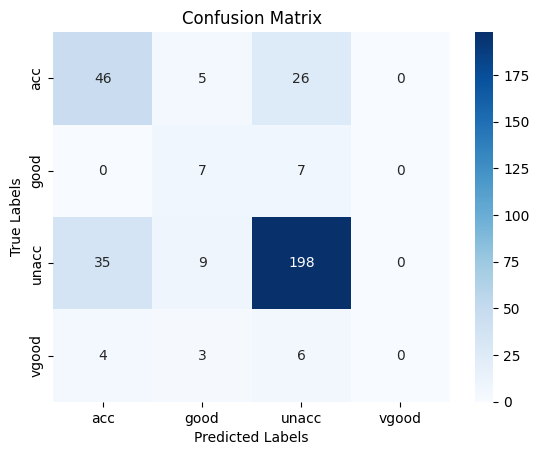

In [104]:
cm = confusion_matrix(y_test, prediction_encoded)
class_labels = le_class.classes_

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
pyplot.xlabel("Predicted Labels")
pyplot.ylabel("True Labels")
pyplot.title("Confusion Matrix")
pyplot.show()